### *Import necessary libraries for data manipulation, preprocessing, modeling, and evaluation*


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### *Loading the diabetes dataset and display basic information about the dataset*
#### *The dataset is assumed to be preprocessed and saved in CSV format*


In [2]:
# Load the dataset
data_path = './balanced_diabetes.csv'  
data = pd.read_csv(data_path)

### *Spliting the dataset into features (X) and target variable (y)*
#### *Performing train-test split with stratification and standardize the feature data*


In [3]:
# Split the dataset into features (X) and target (y)
X = data.drop('Outcome', axis=1)  # Assuming 'Outcome' is the target variable
y = data['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X_train: (761, 8)
Shape of X_test: (191, 8)
Shape of y_train: (761,)
Shape of y_test: (191,)


### *Defining the K-Nearest Neighbors (KNN) classifier and set up the hyperparameter grid*
#### *Using GridSearchCV to find the best combination of hyperparameters*


In [4]:
# Define the model and hyperparameter grid
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Parameters: {'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
Best Cross-Validated Accuracy: 0.8159958720330238


### *Evaluating the best KNN model on the test set*
#### *Generating test accuracy, classification report.*

In [5]:
# Evaluate on test set
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.8534031413612565
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.79      0.84        96
           1       0.81      0.92      0.86        95

    accuracy                           0.85       191
   macro avg       0.86      0.85      0.85       191
weighted avg       0.86      0.85      0.85       191



#### *Visualizing the confusion matrix using a heatmap*

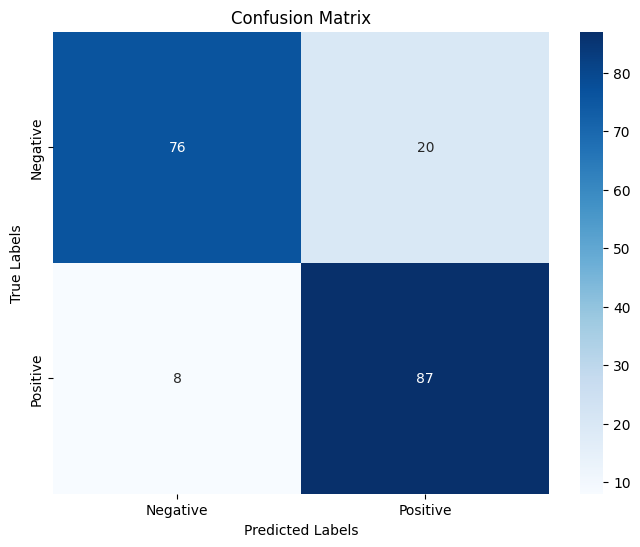

In [6]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### *Ploting ROC Curve*

AUC Score: 0.8537


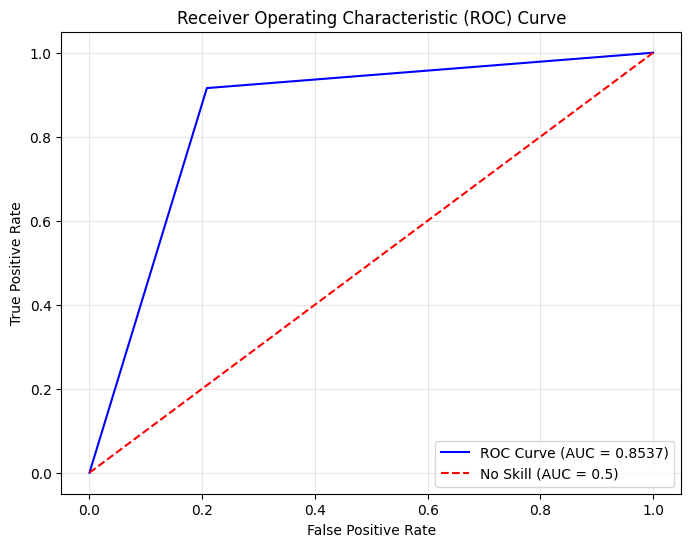

[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END ................n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_ne

In [7]:
# Compute predicted probabilities
y_prob = best_knn.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {roc_auc:.4f}")

# Plot the ROC curve


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='No Skill (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()